# Classifying American Sign Language (ASL) Alphabet Image Dataset using Residual Network in PyTorch
A.K.A. Training an image classifier from scratch to over 90% accuracy in around 1 minute on a single GPU

In this project, we'll use the following techniques to train a state-of-the-art model in around 1 minute to achieve over 90% accuracy in classifying images from the ASL Alphabet Image Dataset,

1. Pick a dataset
2. Download the dataset
3. Import the dataset using Pytorch
4. Explore the dataset
5. Prepare the dataset for training
6. Move the dataset to the GPU
7. Define a neural network
8. Train the model
9. Make predictions on sample images
Iterate on it with different networks and hyperparameters.

In [2]:
!pip install jovian --upgrade --quiet

## Download the Dataset

Using `opendatasets` and download the dataset from https://www.kaggle.com/grassknoted/asl-alphabet

In [3]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/grassknoted/asl-alphabet'

## Fetching Kaggle Datasets into Google Colab
##### Follow the below step to download kaggle dataset. This applies to any of Kaggle dataset.

#####1. Get you Kaggle API Token
Go to Your Account and click on Create New API Token.
A file named kaggle.json will get downloaded containing your username and token key
#####2. Uploading kaggle.json into Google Drive
Create a folder named Kaggle where we will be storing our Kaggle datasets
Upload your kaggle.json file into Kaggle folder

**OR** Manually enter your username and api_key

#Cleaning up directory

In [6]:
import os
import shutil

if os.path.exists('./asl-alphabet'):
  shutil.rmtree('./asl-alphabet')

In [7]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: itsmohsin
Your Kaggle Key: ··········


  1%|          | 9.00M/1.03G [00:00<00:21, 51.7MB/s]

100%|██████████| 1.03G/1.03G [00:24<00:00, 45.5MB/s]


In [8]:
data_dir = './asl-alphabet/asl_alphabet_train/asl_alphabet_train'

## **Description of the Dataset**

This dataset folder contains images of American Sign Language Alphabet


In [9]:
import os 

In [10]:
os.listdir(data_dir)

['X',
 'G',
 'V',
 'I',
 'space',
 'N',
 'W',
 'P',
 'H',
 'Z',
 'R',
 'Q',
 'del',
 'C',
 'J',
 'Y',
 'B',
 'D',
 'F',
 'A',
 'L',
 'M',
 'U',
 'nothing',
 'K',
 'T',
 'E',
 'S',
 'O']

## Import the Dataset Into PyTorch

In [11]:
from torchvision.datasets import ImageFolder

In [12]:
dataset = ImageFolder(data_dir)

In [13]:
len(dataset)

87000

In [14]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=200x200 at 0x7FB554FC5780>, 0)

In [15]:
dataset.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

## Total Images contains in each class ?

In [16]:
for cls in os.listdir(data_dir):
  print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

X : 3000
G : 3000
V : 3000
I : 3000
space : 3000
N : 3000
W : 3000
P : 3000
H : 3000
Z : 3000
R : 3000
Q : 3000
del : 3000
C : 3000
J : 3000
Y : 3000
B : 3000
D : 3000
F : 3000
A : 3000
L : 3000
M : 3000
U : 3000
nothing : 3000
K : 3000
T : 3000
E : 3000
S : 3000
O : 3000


In [17]:
!pip install jovian --quite
import jovian
jovian.commit(project='ASL')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite
[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/itsmohsin/asl


'https://jovian.ai/itsmohsin/asl'

### To Look inside the **Dataset**

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

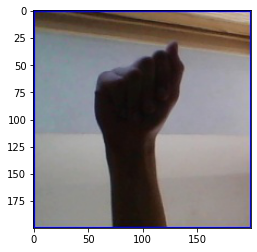

In [19]:
img, label = dataset[0]
plt.imshow(img)

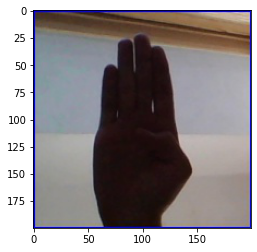

In [20]:
img, label = dataset[5000]
plt.imshow(img)

### Need to Resize the Images


## **Data Preparation**

We can create training and validation datasets using the `ImageFolder` class from `torchvision`. In addition to the `ToTensor` transform, we'll also apply some other transforms to the images. There are few important points we'll consider while creating PyTorch datasets for training and validation:

1. **Use of `random_split`:** We will be setting aside a fraction (e.g. 10%) of the data from the training set for validation using `random_split` helper function. Once we have picked the best model architecture & hyperparameters, it is a good idea to retrain the same model on the entire dataset just to give it a small final boost in performance.

2. **Channel-wise data normalization:** We will normalize the image tensors by *subtracting the mean and dividing by the standard deviation* across each channel. As a result, the mean of the data across each channel is 0, and standard deviation is 1. *Normalizing* the data prevents the values from any one channel from disproportionately affecting the losses and gradients while training, simply by having a higher or wider range of values that others.
<img src="https://i.imgur.com/LYxXBVg.png" width=500>

3. **Randomized data augmentations:** We will apply randomly chosen transformations while loading images from the training dataset. Specifically, we will resize each image to *48 x 48 pixels*, and then pad each image by *6 pixels*, and then take a random crop of size *48 x 48 pixels*, and then *flip the image horizontally* with a 50% probability. Since the transformation will be applied randomly and dynamically each time a particular image is loaded, the model sees slightly different images in each epoch of training, which allows it generalize better.

![data-augmentations](https://imgaug.readthedocs.io/en/latest/_images/cropandpad_percent.jpg)

In [21]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(128),
                                            tt.RandomCrop(128),
                                            tt.ToTensor()]))

##As torch vision creates image into channel as first diminsion we need to put at third diminsion

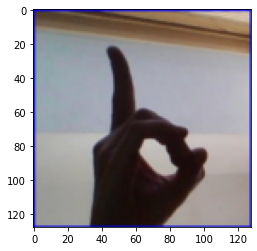

In [22]:
img, label = dataset[10000]
plt.imshow(img.permute((1, 2, 0)))

### To select train size and validation size


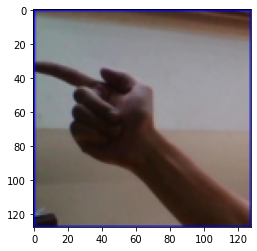

In [23]:
img, label = dataset[20000]
plt.imshow(img.permute((1, 2, 0)))

In [24]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(78300, 8700)

## To Randomly select images

In [25]:
from torch.utils.data import random_split
train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(78300, 8700)

In [26]:
from torch.utils.data import DataLoader

batch_size = 64

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)

In [27]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

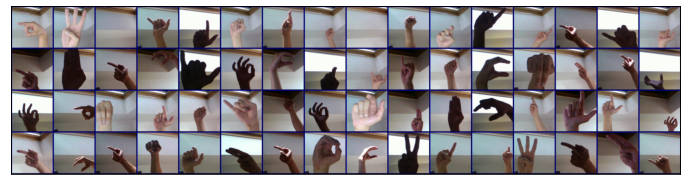

In [28]:
show_batch(train_dl)

## Utility Functions and Classes

#### Using a GPU for faster training

As the sizes of our models and datasets increase, we need to use **GPUs** to train our models within a *reasonable amount of time*. GPUs contain hundreds of cores optimized for performing **expensive matrix operations on floating-point numbers** quickly, making them ideal for *training deep neural networks*. You can use GPUs for free on [Google Colab](https://colab.research.google.com/) and [Kaggle](https://www.kaggle.com/kernels) or rent GPU-powered machines on services like [Google Cloud Platform](https://cloud.google.com/gpu/) and [Amazon Web Services](https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html).

You can use a **Graphics Processing Unit (GPU)** to train your models faster if your execution platform is connected to a GPU manufactured by **NVIDIA**. Follow these instructions to use a GPU on the platform of your choice:

- **Google Colab:** Use the menu option `Runtime` > `Change Runtime Type` and select `GPU` from the `Hardware Accelerator` dropdown.

- **Kaggle:** In the `Settings` section of the sidebar, select `GPU` from the `Accelerator` dropdown. Use the button on the top-right to open the sidebar.

- **Binder:** Notebooks running on Binder cannot use a GPU, as the machines powering Binder aren't connected to any GPUs.

- **Linux:** If your laptop/desktop has an *NVIDIA GPU (graphics card)*, make sure you have installed the **NVIDIA CUDA drivers**.

- **Windows:** If your laptop/desktop has an *NVIDIA GPU (graphics card)*, make sure you have installed the **NVIDIA CUDA drivers**.

- **macOS:** macOS is *not compatible* with NVIDIA GPUs.

We can check if a GPU is available and the required **NVIDIA CUDA drivers** are installed using `torch.cuda.is_available`.

In [29]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

### To Check if gpu is enable 

1.   List item
2.   List item



In [30]:
torch.cuda.is_available()

True

In [31]:
device = get_default_device()
device

device(type='cuda')

In [32]:
img, label = dataset[0]

In [33]:
img.device

device(type='cpu')

In [34]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

In [35]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Model with Residual Blocks and Batch Normalization

Our CNN model also has *residual block*, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers as shown.

<center>
<img src="https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png" width=500>
</center>

This *residual block* produces a drastic improvement in the performance of the model. Also, after each convolutional layer, we'll add a *batch normalization layer*, which normalizes the outputs of the previous layer.

**Reference**:

1. [Residual blocks — Building blocks of ResNet](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec)
2. [Batch Normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)
3. [Dropout](https://towardsdatascience.com/simplified-math-behind-dropout-in-deep-learning-6d50f3f47275)

We will be using the ResNet9 architecture as,
<img src="https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true">

In [36]:
import torch.nn as nn
import torch.nn.functional as F
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
      # "Calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
      # "Calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

## Training the model

The following points are considered before we train the model. These are small but important improvements to our `fit` function.

- **Learning rate scheduling:** Instead of using a fixed learning rate, we will use a *learning rate scheduler*, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **One Cycle Learning Rate Policy**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. [Learn more...](https://sgugger.github.io/the-1cycle-policy.html)

<center>
<img src="https://sgugger.github.io/images/art5_lr_schedule.png" width=400>
</center>

- **Weight decay:** We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. [Learn more...](https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab)

- **Gradient clipping:** Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. [Learn more...](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48)

We define `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [37]:
@torch.no_grad()
def evaluate(model, val_loader):
  # """Evaluates the model's performance on the validation set"""

    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [38]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        #  Input: 128 x 3 x 64 x 64 
        self.conv1 = conv_block(in_channels, 64) # Output: 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # Output: 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128),  # Output: 128 x 128 x 32 x 32
                                  conv_block(128, 128))  # Output: 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # Output: 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True)# Output: 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), # Output: 128 x 512 x 8 x 8
                                  conv_block(512, 512)) # Output: 128 x 512 x 8 x 8
        
        # self.classifier = nn.Sequential(nn.MaxPool2d(4), # Output: 128 x 512 x 2 x 2
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # Output: 128 x 512 x 1 x 1
                                        nn.Flatten(), # Output: 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [39]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [40]:
model.conv1[0].weight.device

device(type='cuda', index=0)

In [41]:
torch.cuda.empty_cache()
for batch in train_dl:
  images, labels = batch
  print('images.shape', images.shape)
  print('image.device', images.device)
  preds = model(images)
  print('preds.shape', preds.shape)
  # print(preds)
  break

images.shape torch.Size([64, 3, 128, 128])
image.device cuda:0
preds.shape torch.Size([64, 29])


### Training the Model

In [42]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.0381656177341938, 'val_loss': 3.3676390647888184}]

In [43]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.3609, val_loss: 0.0061, val_acc: 0.9990
Epoch [1], train_loss: 0.0142, val_loss: 0.0081, val_acc: 0.9978
Epoch [2], train_loss: 0.0113, val_loss: 0.0004, val_acc: 1.0000
Epoch [3], train_loss: 0.0102, val_loss: 0.0012, val_acc: 0.9999
Epoch [4], train_loss: 0.0055, val_loss: 0.0005, val_acc: 1.0000


In [44]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.0769, val_loss: 0.1652, val_acc: 0.9568
Epoch [1], train_loss: 0.0275, val_loss: 0.0040, val_acc: 0.9982
Epoch [2], train_loss: 0.0222, val_loss: 0.0003, val_acc: 0.9999
Epoch [3], train_loss: 0.0204, val_loss: 0.0037, val_acc: 0.9984
Epoch [4], train_loss: 0.0149, val_loss: 0.0174, val_acc: 0.9967


In [45]:
history += fit(5, 0.0001, model, train_dl, valid_dl)

Epoch [0], train_loss: 0.0097, val_loss: 0.0060, val_acc: 0.9985
Epoch [1], train_loss: 0.0057, val_loss: 0.0028, val_acc: 0.9995
Epoch [2], train_loss: 0.0040, val_loss: 0.0024, val_acc: 0.9997
Epoch [3], train_loss: 0.0039, val_loss: 0.0020, val_acc: 0.9997
Epoch [4], train_loss: 0.0033, val_loss: 0.0016, val_acc: 0.9997


In [46]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.SGD)

Epoch [0], train_loss: 0.0028, val_loss: 0.0015, val_acc: 0.9998
Epoch [1], train_loss: 0.0020, val_loss: 0.0014, val_acc: 0.9998
Epoch [2], train_loss: 0.0024, val_loss: 0.0012, val_acc: 0.9999
Epoch [3], train_loss: 0.0019, val_loss: 0.0012, val_acc: 0.9999
Epoch [4], train_loss: 0.0022, val_loss: 0.0011, val_acc: 0.9999


In [47]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

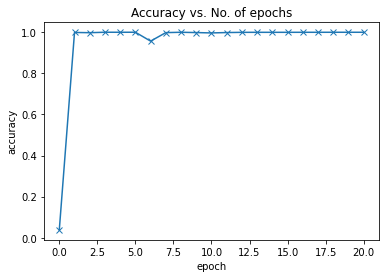

In [48]:
plot_accuracies(history)

In [49]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

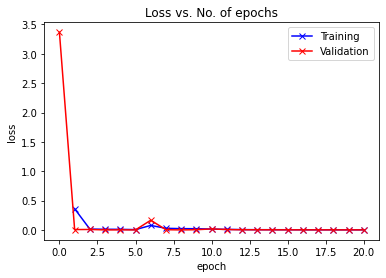

In [50]:
plot_losses(history)

In [51]:
jovian.reset()
jovian.log_dataset(image_size=64)
jovian.log_hyperparams(batch_size=128,
                       arch= 'ResNet9',
                       epochs='20',
                       lrs=[0.001, 0.001, 1e-4, 1e-4],
                       opt=['Adam', 'Adam', 'Adam', 'SGD'])
jovian.log_metrics(train_loss=history[-1]['train_loss'],
                   val_acc=history[-1]['val_acc'],
                   val_loss=history[-1]['val_loss'])

[jovian] Dataset logged.
[jovian] Hyperparams logged.
[jovian] Metrics logged.


In [52]:
jovian.commit(project='ASL')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/itsmohsin/asl


'https://jovian.ai/itsmohsin/asl'

### Test with Individual Images

In [53]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [54]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction', pred)

Target: J
Prediction J


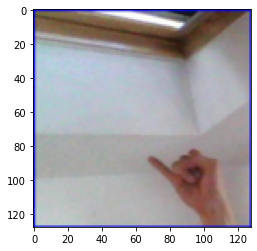

In [55]:
show_image_prediction(*valid_ds[100])

Target: nothing
Prediction nothing


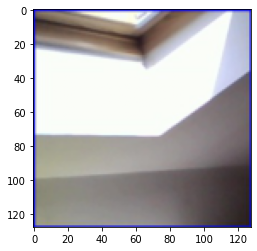

In [56]:
show_image_prediction(*valid_ds[123])

Target: D
Prediction D


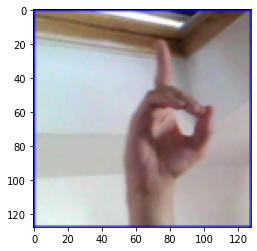

In [57]:
show_image_prediction(*valid_ds[303])

Target: O
Prediction O


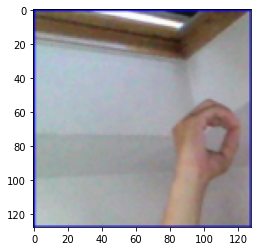

In [58]:
show_image_prediction(*valid_ds[225])

Target: D
Prediction D


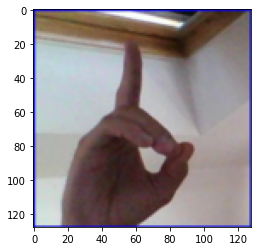

In [59]:
show_image_prediction(*valid_ds[40])

###Saving the Model and Commit

In [60]:
torch.save(model.state_dict(), 'asl-resnet9.pth')

In [61]:
jovian.commit(project='ASL', outputs=['asl-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/itsmohsin/asl


'https://jovian.ai/itsmohsin/asl'

## **Summary and Further Reading**

Here's a summary of the different techniques used to improve our model performance and reduce the training time:

- **Data normalization:** We normalized the image tensors by *subtracting the mean and dividing by the standard deviation* of pixels across each channel. Normalizing the data prevents the pixel values from any one channel from *disproportionately affecting the losses and gradients*. [Learn more...](https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd)

- **Data augmentation:** We applied random transformations while loading images from the training dataset. Specifically, we will pad each image by *6 pixels*, and then take a random crop of size *48 x 48 pixels*, and then *flip the image horizontally* with a 50% probability. [Learn more...](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/)

- **Residual connections:** We have used residual block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers as shown. We used the ResNet9 architecture [Learn more...](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec)

- **Batch normalization:** After each convolutional layer, we added a batch normalization layer, which normalizes the outputs of the previous layer. This is somewhat similar to data normalization, except it's applied to the outputs of a layer, and the mean and standard deviation are learned parameters. [Learn more...](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)

- **Dropout:** Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During training, some number of layer outputs are randomly ignored or *dropped out*. [Learn more...](https://towardsdatascience.com/simplified-math-behind-dropout-in-deep-learning-6d50f3f47275)

- **Learning rate scheduling:** Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are [many strategies](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for varying the learning rate during training, and we used the *One Cycle Learning Rate Policy*. [Learn more...](https://sgugger.github.io/the-1cycle-policy.html)

- **Weight Decay:** We added weight decay to the optimizer, yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. [Learn more](https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab)

- **Gradient clipping:** We also added gradient clippint, which helps limit the values of gradients to a small range to prevent undesirable changes in model parameters due to large gradient values during training. [Learn more...](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48)

- **Adam optimizer:** [Adam optimizer](https://ruder.io/optimizing-gradient-descent/index.html#adam) uses techniques like momentum and adaptive learning rates for faster training. There are many other optimizers to choose from and experiment with. [Learn more...](https://ruder.io/optimizing-gradient-descent/index.html)